In [1]:
#Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [2]:
# Load the MIST dataset
(x_train, y_train), (x_test, y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
#Preprocess the data
x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test=x_test.reshape((x_test.shape[0], 28, 28, 1 ))
x_train=x_train/255.0
x_test=x_test/255.0


In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [9]:
#Convert to labels in the training set into one-hot encoding vectors
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
#Create a sequential model . ie. layer by layer
model= Sequential()

In [12]:
#Add a convolutional layer with 32 filters, a 3*3 kernel and 'relu' activation
#add() adds each layer to the n/w
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28, 28, 1)))

In [13]:
#Add a max pooling layer with 2*2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:

#Flatten the ouput before feeding it into densely conected layers
model.add(Flatten())


In [16]:

#Add a dense layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))


In [17]:
#Add the output layer with 10 units (for 10 classes) and 'softmax' activation
model.add(Dense(10,activation='softmax'))

In [18]:
#Compile the models
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [19]:
#Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 [==============================] - 36s 37ms/step - loss: 0.1712 - accuracy: 0.9502 - val_loss: 0.0657 - val_accuracy: 0.9774
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0566 - accuracy: 0.9829 - val_loss: 0.0465 - val_accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 29s 30ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0423 - val_accuracy: 0.9851
Epoch 4/5
938/938 [==============================] - 30s 31ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0480 - val_accuracy: 0.9843
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0456 - val_accuracy: 0.9853


In [20]:
#Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'\nTest loss:{loss:.4f},Test Accuracy:{accuracy:.4f}')


313/313 [==============================] - 2s 7ms/step - loss: 0.0456 - accuracy: 0.9853

Test loss:0.0456,Test Accuracy:0.9853


In [21]:
# Make predictions on test data
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [22]:
print(predictions)

[[2.5809277e-10 2.0803727e-08 3.8676497e-08 ... 9.9999946e-01
  6.3702541e-09 3.9827878e-08]
 [8.4153982e-09 9.5492464e-07 9.9999803e-01 ... 1.5572162e-11
  3.9398200e-09 1.5417928e-10]
 [4.7072518e-08 9.9998838e-01 1.7458100e-07 ... 9.4939514e-06
  1.3443004e-07 3.3450076e-09]
 ...
 [3.3939501e-12 1.6074969e-08 5.3467247e-10 ... 8.8121506e-06
  3.7165289e-06 6.0933085e-06]
 [1.7798196e-09 2.6659100e-13 2.3184902e-13 ... 9.8342681e-11
  1.5710661e-05 1.2979767e-11]
 [2.4318786e-10 1.4639519e-10 2.1946802e-08 ... 2.0117131e-12
  3.0894391e-08 9.6183114e-12]]


In [23]:
print(predictions[0])

[2.5809277e-10 2.0803727e-08 3.8676497e-08 4.4083615e-07 7.3669036e-11
 1.1993875e-09 2.8887857e-15 9.9999946e-01 6.3702541e-09 3.9827878e-08]


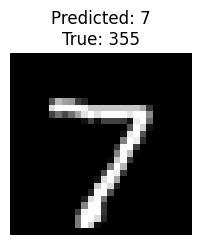

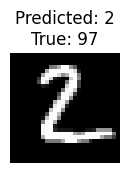

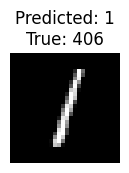

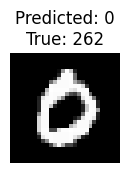

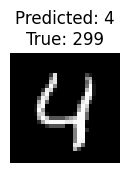

In [24]:
# Plot a few test images along with their predicted labels
import matplotlib.pyplot as plt
import numpy as np

num_images_to_plot = 5
plt.figure(figsize=(10, 5))
for i in range(num_images_to_plot):
  plt.subplot(1, num_images_to_plot, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {np.argmax(x_test[i])}")
  plt.axis('off')
  plt.tight_layout()
  plt.show()
